In [1]:
# Downloading dataset
import requests

url = 'https://huggingface.co/datasets/Ammok/apple_stock_price_from_1980-2021/raw/main/AAPL.csv'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    with open('AAPL.csv', 'wb') as f:
        f.write(response.content)
    print('Dataset downloaded successfully.')
else:
    print('Failed to download dataset. Status code:', response.status_code)


Dataset downloaded successfully.


In [2]:
# Loading dataset
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('AAPL.csv')

# Displaying the first few rows of the dataset
print(df.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [3]:
# checking null values
print(df.isnull().sum())

# checking data types
print(df.dtypes)

# printing summary
print(df.describe())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
               Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

         

/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.p

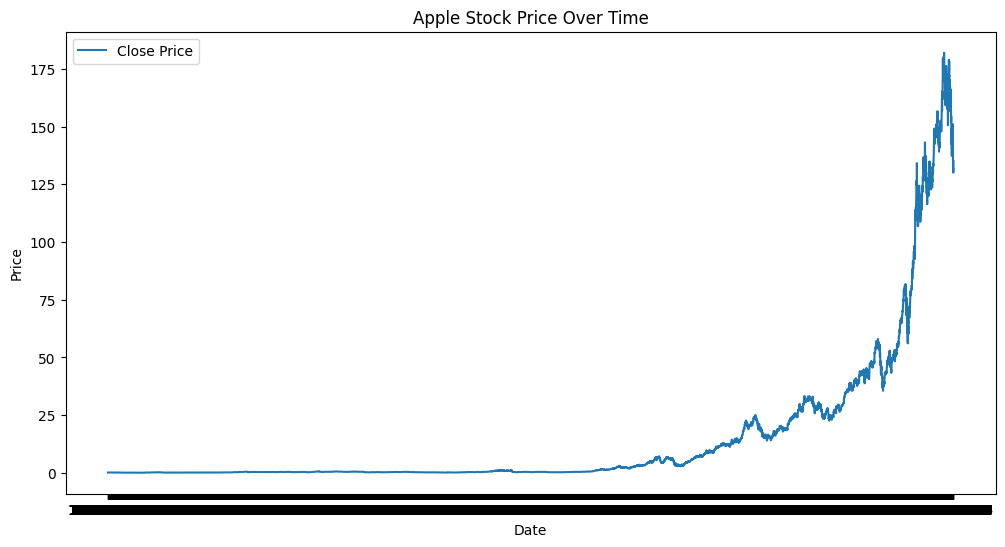

In [4]:
# Visualize Stock Price Over Time

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plt.plot(np.array(df['Date']), np.array(df['Close']), label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price Over Time')
plt.legend()
plt.show()


/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.p

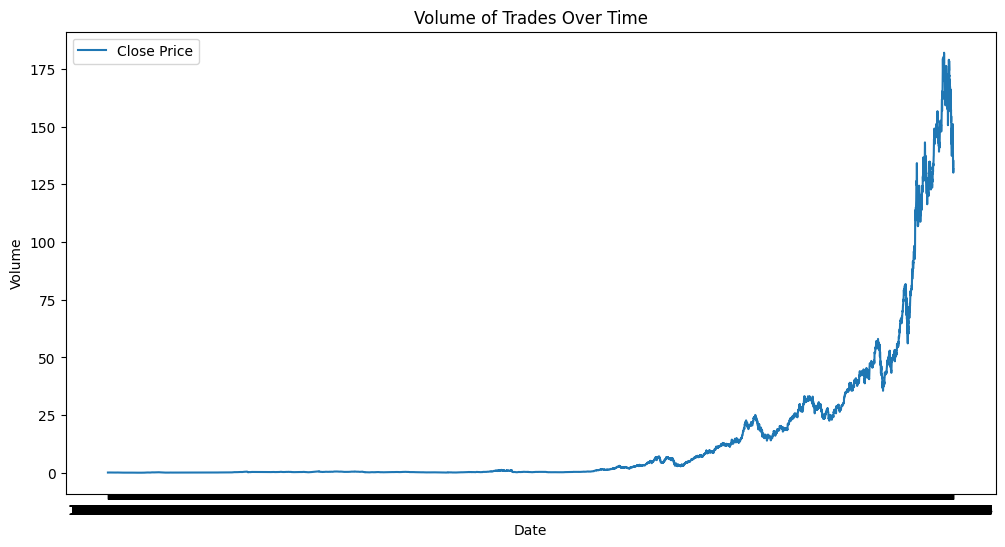

In [5]:
# Volume of Trades

plt.figure(figsize=(12, 6))
plt.plot(np.array(df['Date']), np.array(df['Close']), label='Close Price')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Trades Over Time')
plt.legend()
plt.show()


/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.p

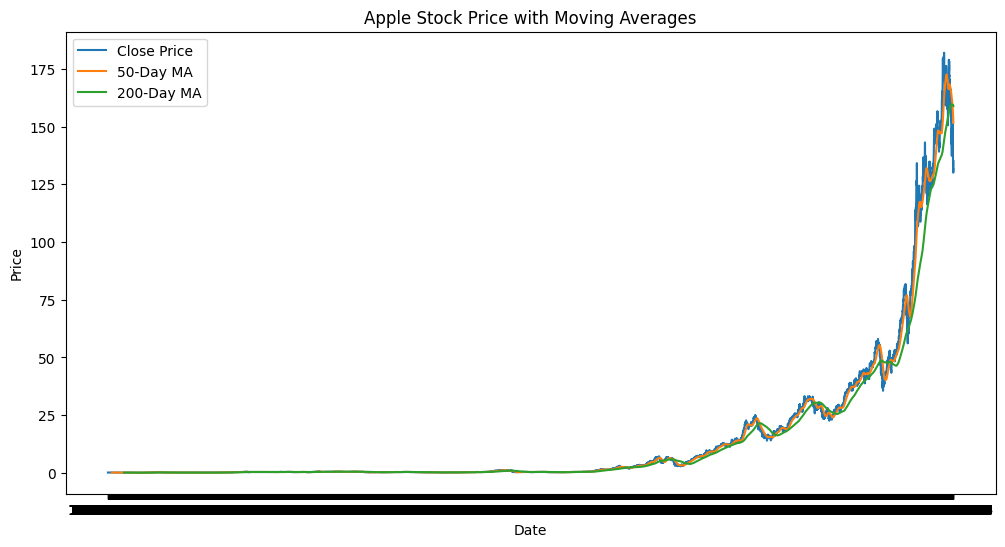

In [6]:
# Moving Averages

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(np.array(df['Date']), np.array(df['Close']), label='Close Price')
plt.plot(np.array(df['Date']), np.array(df['MA50']), label='50-Day MA')
plt.plot(np.array(df['Date']), np.array(df['MA200']), label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with Moving Averages')
plt.legend()
plt.show()


#### feature engineering

In [7]:
# Createing features for historical stock prices, volume of trades, and moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Shifting the features by one day to use them as lagged features
df['Close_lag1'] = df['Close'].shift(1)
df['Volume_lag1'] = df['Volume'].shift(1)
df['MA50_lag1'] = df['MA50'].shift(1)
df['MA200_lag1'] = df['MA200'].shift(1)

# Dropping rows with missing values created by the lagging operation
df = df.dropna()


#### splitting data

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Close_lag1', 'Volume_lag1', 'MA50_lag1', 'MA200_lag1']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Selection and Hyperparameter Tuning

In [9]:
# importing models
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Lasso Regression
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_param_grid, cv=3, n_jobs=-1, verbose=2)
lasso_grid.fit(X_train, y_train)

# Ridge Regression
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=3, n_jobs=-1, verbose=2)
ridge_grid.fit(X_train, y_train)

# Random Forest Regression
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)


# Best parameters for each model
print("Lasso Best Parameters:", lasso_grid.best_params_)
print("Ridge Best Parameters:", ridge_grid.best_params_)
 
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Gradient Boosting Best Parameters:", gb_grid.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.2s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END ........................................

/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.06939e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.25289e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.06939e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vinithreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.06717e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vinithred

[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ...................

#### Model Evaluation

In [10]:
# Predictions
y_pred_lasso = lasso_grid.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("Lasso Regression - MAE:", mae_lasso, "RMSE:", rmse_lasso)

y_pred_ridge = ridge_grid.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Ridge Regression - MAE:", mae_ridge, "RMSE:", rmse_ridge)

y_pred_rf = rf_grid.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest - MAE:", mae_rf, "RMSE:", rmse_rf)

y_pred_gb = gb_grid.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print("Gradient Boosting - MAE:", mae_gb, "RMSE:", rmse_gb)


Lasso Regression - MAE: 0.19162758882438233 RMSE: 0.6111767645235695
Ridge Regression - MAE: 0.19134613677344575 RMSE: 0.6117538370577823
Random Forest - MAE: 0.19450281366389235 RMSE: 0.6492790046925744
Gradient Boosting - MAE: 0.21412548475837792 RMSE: 0.670394675317647
